In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
def split_yyyymm(df):
    # Verificar si la columna 'YYYYMM' existe en el DataFrame
    if 'YYYYMM' not in df.columns:
        raise ValueError("La columna 'YYYYMM' no está presente en el DataFrame.")
    
    # Convertir la columna 'YYYYMM' a formato de cadena (string)
    df['YYYYMM'] = df['YYYYMM'].astype(str)
    
    # Dividir la columna 'YYYYMM' en 'YYYY' y 'MM'
    df['YYYY'] = df['YYYYMM'].str[:4]  # Obtener los primeros 4 caracteres para 'YYYY'
    df['MM'] = df['YYYYMM'].str[4:]    # Obtener los últimos 2 caracteres para 'MM'
    
    return df

In [22]:
# ruta al archivo zip
ruta_zip = '..\\..\\datasets\\co2 emisiones usa.csv'

co2_usa = pd.read_csv(ruta_zip)
co2_usa

,YYYYMM,Value
0,197301,72.076
1,197302,64.442
2,197303,64.084
3,197304,60.842
4,197305,61.798
...,...,...
518,201603,72.840
519,201604,71.410
520,201605,82.510
521,201606,115.772


In [23]:
split_yyyymm(co2_usa).head()

,YYYYMM,Value,YYYY,MM
0,197301,72.076,1973,01
1,197302,64.442,1973,02
2,197303,64.084,1973,03
3,197304,60.842,1973,04
4,197305,61.798,1973,05


In [24]:
#elimino la columna 'YYYYMM'
co2_usa.drop(labels='YYYYMM', axis=1, inplace=True)

#reordeno las columnas
co2_usa = co2_usa[['MM', 'YYYY', 'Value']]
co2_usa.head()

#convierto columnas MM y YYYY a int ya que están como string
co2_usa['MM'] = co2_usa['MM'].astype(int)
co2_usa['YYYY'] = co2_usa['YYYY'].astype(int)

co2_usa.head()

,MM,YYYY,Value
0,1,1973,72.076
1,2,1973,64.442
2,3,1973,64.084
3,4,1973,60.842
4,5,1973,61.798


In [25]:
co2_usa.dtypes

MM         int32
YYYY       int32
Value    float64
dtype: object

In [34]:
#agrupo por año y determino el promedio de emisiones durante ese periodo
co2_usa_agrupado = co2_usa.groupby('YYYY')['Value'].mean().reset_index()
co2_usa_agrupado

,YYYY,Value
0,1973,67.649250
1,1974,66.677583
2,1975,68.645000
3,1976,75.945583
4,1977,80.178583
5,1978,79.993083
6,1979,87.975333
7,1980,94.716167
8,1981,98.364000
9,1982,98.496333


## Visualizacion

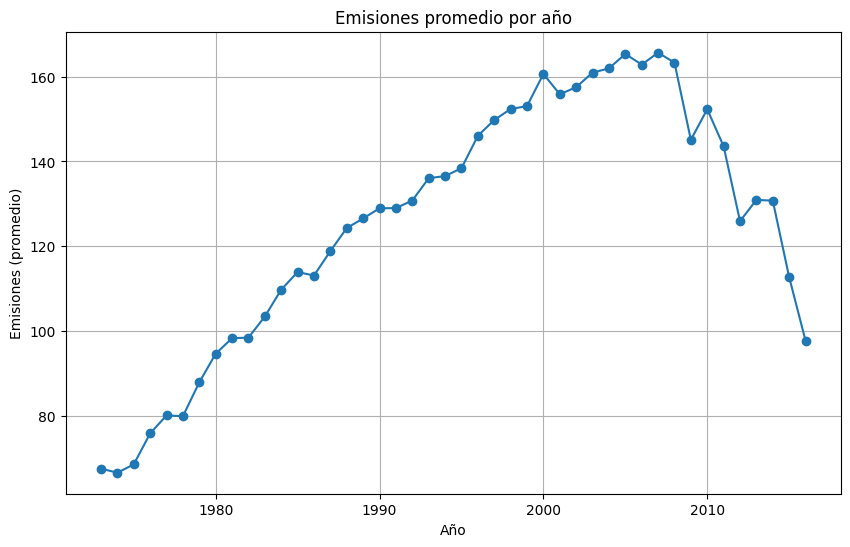

In [37]:
# Crear el gráfico de línea
plt.figure(figsize=(10, 6))
plt.plot(co2_usa_agrupado['YYYY'], co2_usa_agrupado['Value'], marker='o', linestyle='-')

# Añadir título y etiquetas
plt.title('Emisiones promedio por año')
plt.xlabel('Año')
plt.ylabel('Emisiones (promedio)')

# Mostrar el gráfico
plt.grid(True)
plt.show()